In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv"

bike_df = pd.read_csv(url)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


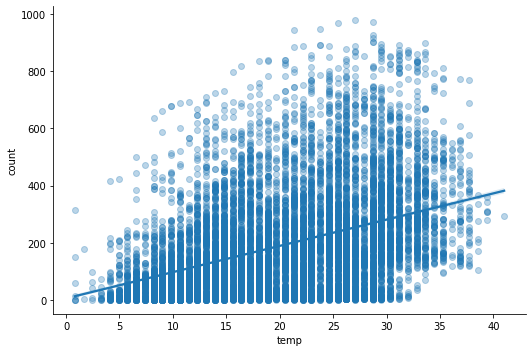

In [ ]:
# Getting the line of best fit using seaborn

sb.lmplot(x = 'temp',y= 'count', data=bike_df, aspect=1.5, scatter_kws={'alpha':0.3})

In [ ]:
# Linear Regression using sci-kit learn 

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Predictors (List of values of the Independent Variable )
# X = bike_df['temp']

# # Predictors (List of values of the Independent Variable )
# y = bike_df['count']

# lr = LinearRegression()

# lr.fit(X,y)

ValueError: ignored

In [ ]:
# Ouchh!!
print(type(bike_df['temp']))
print(type(bike_df[['temp']]))

# Got the difference!! Thank God!

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.linear_model import LinearRegression

# Predictors (List of values of the Independent Variable )
X = bike_df[['temp']]

# Predictors (List of values of the Independent Variable )
y = bike_df['count']

lr = LinearRegression()

lr.fit(X,y)

LinearRegression()

In [ ]:
print(lr.intercept_, lr.coef_)

6.046212959616611 [9.17054048]


In [ ]:
lr.predict([[20]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([189.45702259])

In [ ]:
# Multiple Linear Regression

features = ['season','weather','humidity','temp', 'casual']

X = bike_df[features]
y = bike_df['count']

lr_1 = LinearRegression()
lr.fit(X,y)
linear_coef = list(zip(features, lr.coef_))
print(linear_coef)

[('season', 17.758148541054876), ('weather', 2.2905900186127646), ('humidity', -1.199843896230155), ('temp', 1.8135648680245895), ('casual', 2.1757944199144985)]


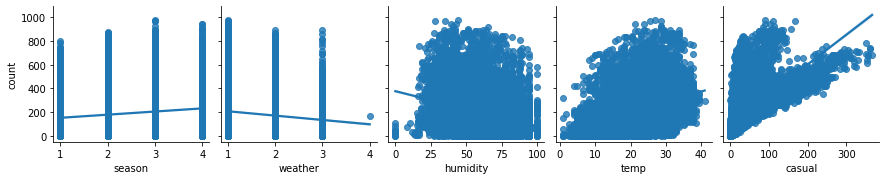

In [ ]:
# It seems that season plays a major role and people don't give a damn about humidity

sb.pairplot(bike_df, x_vars=features, y_vars='count', kind='reg')

# The figures below are NOT generated from the model we have just created but have been created by seaborn 

In [ ]:
# Lets test the efficiency of the model

from sklearn.model_selection import train_test_split

X = bike_df[features]
y = bike_df['count']

Xtr, Xte, Ytr, Yte = train_test_split(X, y)

In [ ]:
# Fitting our model, This time we will fit onto  train data only and test the predictions on test set

lr_2 = LinearRegression()

lr_2.fit(Xtr,Ytr)

# Funneling predictions 
Ypred = lr_2.predict(Xte) 

In [ ]:
# MAE, MSE, RMSE

from sklearn import metrics

mae = metrics.mean_absolute_error(Yte, Ypred)
mse = metrics.mean_squared_error(Yte, Ypred)
rmse = np.sqrt(metrics.mean_squared_error(Yte, Ypred))

print('Mean Absolute Error', mae)
print('Mean Squared Error', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 90.80696146738462
Mean Squared Error 16604.091879416104
Root Mean Squared Error 128.85686586059785


In [ ]:
#Taking continuous quantities only into consideration
Xtr1 = Xtr[['humidity','temp','casual']]

Xtr1.shape

(8164, 3)

In [ ]:
Ytr

9302     93
5976      4
451      64
7593    733
6562    390
       ... 
7773    139
248     136
524      39
3586    398
9940    332
Name: count, Length: 8164, dtype: int64

In [ ]:
# I just wanna try this bitch with Neural Networks

import tensorflow as tf 

tf.random.set_seed(41)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_dim=3 ),
    tf.keras.layers.Dense(1)


])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001),
              metrics = ["mae"]) 
hist = model.fit(tf.expand_dims(Xtr1, axis=-1),Ytr, epochs=20)

Epoch 1/20
256/256 [==============================] - 1s 1ms/step - loss: 144.4681 - mae: 144.4681
Epoch 2/20
256/256 [==============================] - 0s 1ms/step - loss: 94.4410 - mae: 94.4410
Epoch 3/20
256/256 [==============================] - 0s 1ms/step - loss: 89.7533 - mae: 89.7533
Epoch 4/20
256/256 [==============================] - 0s 1ms/step - loss: 88.8296 - mae: 88.8296
Epoch 5/20
256/256 [==============================] - 0s 1ms/step - loss: 88.4450 - mae: 88.4450
Epoch 6/20
256/256 [==============================] - 0s 1ms/step - loss: 88.1225 - mae: 88.1225
Epoch 7/20
256/256 [==============================] - 0s 1ms/step - loss: 87.8146 - mae: 87.8146
Epoch 8/20
256/256 [==============================] - 0s 1ms/step - loss: 87.5606 - mae: 87.5606
Epoch 9/20
256/256 [==============================] - 0s 1ms/step - loss: 87.3196 - mae: 87.3196
Epoch 10/20
256/256 [==============================] - 0s 1ms/step - loss: 87.1282 - mae: 87.1282
Epoch 11/20
256/256 [======

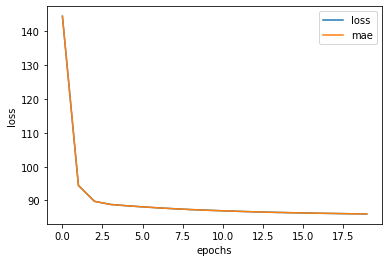

In [ ]:
pd.DataFrame(hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
Xte1 = Xte[['humidity','temp','casual']]

Xte1.shape

(2722, 3)

In [ ]:
model.evaluate(Xte1,Yte)

86/86 [==============================] - 0s 1ms/step - loss: 89.1502 - mae: 89.1502


[89.15018463134766, 89.15018463134766]